# Workshop 4, Advanced AI - Statistics Module

Student: Ricardo Andrés Cáceres Villibord

Date: 23 de Agosto del 2023 

***Abstract***
- *In this workshop we start learning about the Simple Linear Regression Model.*

*Complete Workshop Instructions can be found at: https://rpubs.com/cdorante/tc3006c_w4*

### 4. Types of Data Structures

The market model is a time-series regression model. In this model we looked at the relationship between 2 variables representing one feature or attribute (returns) of two “subjects” over time: a stock and a market index. The market model is an example of a regression model, but the data structure or type of data used is time-series data. These type of regression models are called pulled time-series regression.

There are basically three types of data used in regression models:

- Time-series: each observation represents one period, and each column represents one or more variables, which are characteristics of one or more subjects. Then, we have one or more variables measured in several time periods.

- Cross-sectional: each observation represents one subject in only one time period, and each column represents variables or characteristics of the subjects.

- Panel data: this is a combination of time-series with cross-sectional structure.

Then, we can consider the market model as a pulled “time-series” regression model.

Another way to classify regression models is based on the number of independent variables. If the regression model considers only one independent variable, the the model is known as simple regression model. If the model considers more than one independent variable, the model is known as multiple regression model.

### 5. The OLS Method

The purpose of OLS is to find the best regression line that best represents all the points (x_i,y_i). The beta0 and beta1 coefficients define the regression line. If beta0 changes, then the intercept of the line moves. If beta1 changes, then the slope of the line changes.

To find the best regression line (beta0 and beta1), the OLS method tries to minimize the sum of squared errors of the regression equation. Then OLS is an optimization method with the following objective:

Minimize 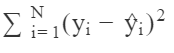

If we replace 
 by the regression equation we get:

Minimize 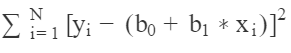

Then, this sum can be seen as a function of 
 and 
. If 
 changes, this sum changes; the same with 
. Then we can re-write the optimization objective as:

Minimize:
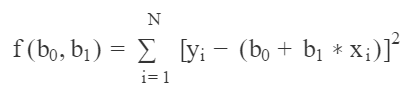

This is a quadratic function of 2 variables. If we get its 2 first partial derivatives (with respect to 
 and 
) and make them equal to zero we will get 2 equations and 2 unknowns, and the solution will be the optimal values of 
 and 
 that minimizes this sum of squared errors. The set of these 2 partial derivatives is also called the gradient of the function.

If you remember basic geometry, if we imagine possible values of 
 in the X axis and values of 
 in the Y axis, then this function is actually a single-curved area (surface). The optimal point (
) will be the lowest point of this curved surface.

Let’s do an example with a dataset of only 4 observations:

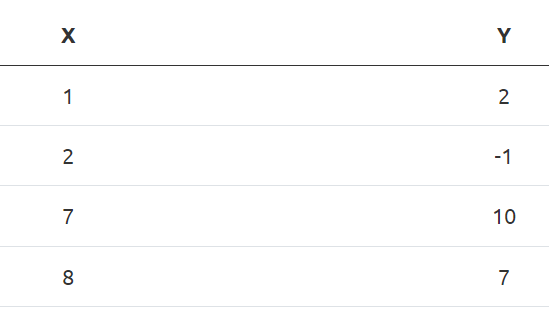

If I do a scatter plot and a line that fits the points:

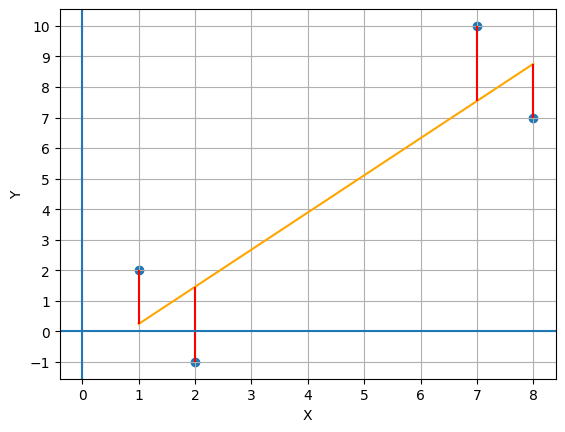

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
data = {'x':  [1,2,7,8],
        'y': [2,-1,10,7]}
df = pd.DataFrame(data)
b1,b0 = np.polyfit(df.x,df.y,1)
df['yhat'] = b0 + b1*df['x']
#plt.clf()
plt.scatter(df.x,df.y)
plt.plot(df.x, df.yhat,c="orange")
plt.xticks(np.arange(-4,14,1))
plt.yticks(np.arange(-2,11,1))

for i in range(4):
  x=df.x.iloc[i]
  ymin= df.y.iloc[i]
  ymax=df.yhat.iloc[i]
  if (ymin>ymax):
    temp=ymax
    ymax=ymin
    ymin=temp
  plt.vlines(x=x,ymin=ymin,ymax=ymax,color='r')

plt.axhline(y=0)
plt.axvline(x=0)

plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

We can see the errors in the red vertical lines. There are two positive errors and two negative errors.

The purpose of OLS is to find the values of 
 and 
 such that the sum of the squared of all errors is minimized. Mathematically there is only one solution for a specific set of X and Y values.

We can do a 3D plot for this function to have a better idea. It is a 3D plot since the function depends on 2 values: b_0
 and 
b_1:

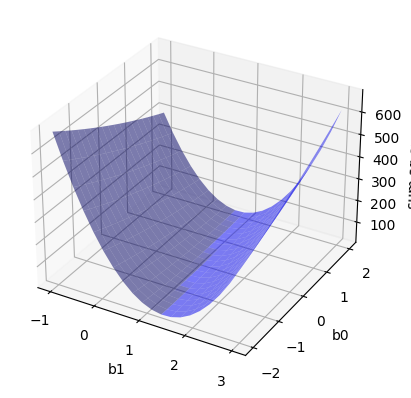

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
# I define a function to get the sum of squared errors given a specific b0 and b1 coefficients:
def sumsqerrors2(b1, b0,df):
    return sum( ( df.y - (b0+b1*df.x)) **2)
# Note that df is a dataframe, so this line of code performs a row-wise operation to avoid 
#   writing a loop to sum each squared error for each observation

# Create the plot:
fig = plt.figure()

ax = fig.add_subplot(1,1,1, projection='3d')
# I create 20 possible values of beta0 and beta1:
# beta1 will move between -1 and 3
b1s = np.linspace(-1, 3.0, 20)
# beta0 will move between -2 and 2:
b0s = np.linspace(-2, 2, 20)
# I create a grid with all possible combinations of beta0 and beta1 using the meshgrid function:
# M will be all the b1s values, and B the beta0 values:
M, B = np.meshgrid(b1s, b0s)
# I calculate the sum of squared errors with all possible pairs of beta0 and beta1 of the previous grid:
zs = np.array([sumsqerrors2(mp, bp, df) 
        for mp, bp in zip(np.ravel(M), np.ravel(B))])
# I reshape the zs (squared errors) from a vector to a grid of the same size as M (20x20)
Z = zs.reshape(M.shape)

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.set_xlabel('b1')
ax.set_ylabel('b0')
ax.set_zlabel('sum sq.errors')

plt.show()

The lowest point of this surface will be the optimal values of (b_0
,b_1 
) where the sum of squared error is the minimum of all

### **6.CHALLENGE: ESTIMATE A MARKET REGRESSION MODEL**

Now it’s time to use real data to better understand this model. Download monthly prices for Alfa (ALFAA.MX) and the Mexican market index IPCyC (^MXX) from Yahoo Finance from January 2018 to July 2022.

You have to do the following:

- **Calculate cc returns of both stocks and drop NA values**

In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Getting price data and selecting adjusted price columns:
stock_prices = yf.download(['ALFAA.MX', '^MXX'], start="2017-01-01", interval="1mo")
stock_prices = stock_prices['Adj Close']

# Calculating returns:
stock_returns = np.log(stock_prices) - np.log(stock_prices.shift(1))
# Deleting the first month with NAs:
stock_returns = stock_returns.dropna()
stock_returns.columns = ['ALFAAret','MXXret']

[*********************100%***********************]  2 of 2 completed


- **Do a scatter plot including the regression line and interpret the plot**

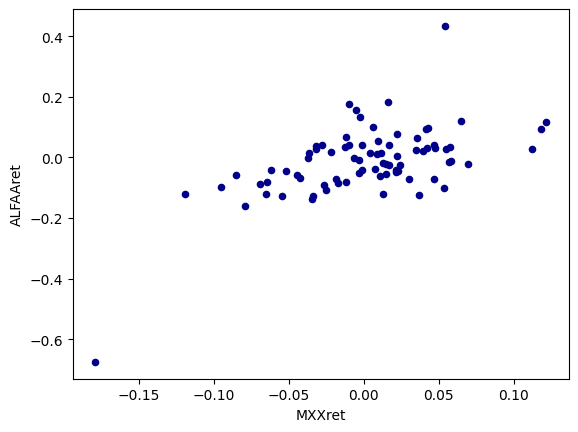

In [19]:
stock_returns.plot.scatter(x='MXXret', y='ALFAAret',c='DarkBlue')
plt.show()

**Scatter plots can be misleading when ranges of X and Y are very different. In this case, Alfa had a very bad month in the COVID crisis with more than 60% decline**

**Then, we can re-do the scatter plot trying to make the X and Y axis using the same range of values**

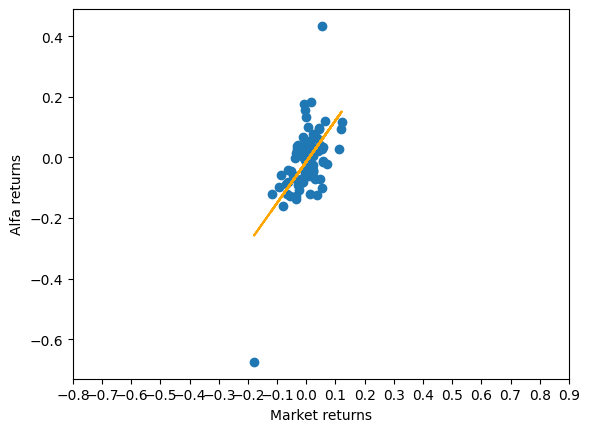

In [20]:
plt.clf()
x = stock_returns['MXXret']
y = stock_returns['ALFAAret']
plt.scatter(x, y)
# Now I add the regression line:
# The polyfit function actually calculates the beta0 and beta1 of the linear regression line:
b1,b0 = np.polyfit(x,y,1)
# With the beta coefficients I calculated the predicted line (yfit)
yfit = b0+b1*x
plt.plot(x, yfit, c="orange")
# I change the range for X trying to make both axis moving in the same range:
plt.xticks(np.arange(-0.80,1,0.1))
# I label the axis:
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

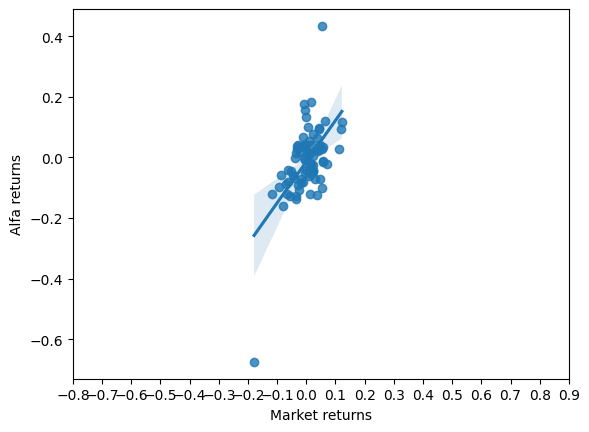

In [23]:
# Another faster way to plot a scatter and the regression line:
# I use the seaborn library:
import seaborn as sns
plt.clf()
sns.regplot(x = x, y = y)
plt.xticks(np.arange(-0.80,1,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

- **Run the market regression model (the Y=stock return, the X=market return). You can use the function OLS from the statsmodels.api library.**

In [24]:
import statsmodels.api as sm
# I add a column of 1's to the X dataframe in order to include the beta0 coefficient (intercept) in the model:
X = sm.add_constant(x)
# I estimate the OLS regression model:
mkmodel = sm.OLS(y,X).fit()
# I display the summary of the regression: 
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               ALFAAret   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     38.83
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           2.28e-08
Time:                        12:04:04   Log-Likelihood:                 72.973
No. Observations:                  79   AIC:                            -141.9
Df Residuals:                      77   BIC:                            -137.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0141      0.011     -1.289      0.2

In [26]:
# I can also run the OLS regression using the ols function 
import statsmodels.formula.api as smf

mkmodel2 = smf.ols('ALFAAret ~ MXXret', data = stock_returns).fit()
# This function does not require to add the column of 1's to include the intercept!
print(mkmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:               ALFAAret   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     38.83
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           2.28e-08
Time:                        12:06:32   Log-Likelihood:                 72.973
No. Observations:                  79   AIC:                            -141.9
Df Residuals:                      77   BIC:                            -137.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0141      0.011     -1.289      0.2

In [27]:
# Using matrix algebra to estimate the beta coefficients:
# I add the column of 1's to the dataframe:
stock_returns['constant'] = 1
selcols = ['constant','MXXret']
# I set x as a matrix with the column of 1's and the values of X:
x = stock_returns[selcols].values
# I set y as the dependent variable:
y = stock_returns['ALFAAret'].values
# I calculate the matrix multiplication X'X:
xtx = np.matmul(x.transpose(),x)
# I calculate the matrix multiplication X'Y:
xty = np.matmul(x.transpose(),y)
# I get the inverse of the matrix (X'X) to solve for the beta coefficients:
invtxt = np.linalg.inv(xtx)
# I multiply inv(X'X)*X'Y to get the estimation of the beta vector (beta0 and beta1 coefficients) 
betas = np.matmul(invtxt,xty)
betas

array([-0.0141229,  1.3602816])

- **Write down the regression equation**

In [29]:
print("The regression equation is\n E[ALFAret]=", betas[0],"+",betas[1],"*","MXXret")

The regression equation is
 E[ALFAret]= -0.01412290207201114 + 1.3602815967803656 * MXXret


In the regression outputs we see that both beta coefficients have not only their optimal values, but also their standard error, t-Statistic, p-values, and their 95% confidence intervals. Note that the regression function in Python automatically performs hypothesis testing for both coefficients,b_0
 and b_1
, where the null hypotheses are that the coefficients are equal to zero

### **8 CHALLENGE: ESTIMATE MOVING BETAS FOR THE MARKET REGRESSION MODEL**

1. **Download monthly stock prices for ALFAA.MX and the market (^MXX) from Jan 2010 to Jul 2022, and calculate cc returns.**

In [30]:
# Getting price data and selecting adjusted price columns:
stock_prices = yf.download(['ALFAA.MX', '^MXX'], start="2017-01-01", interval="1mo")
stock_prices = stock_prices['Adj Close']

# Calculating returns:
stock_returns = np.log(stock_prices) - np.log(stock_prices.shift(1))
# Deleting the first month with NAs:
stock_returns = stock_returns.dropna()
stock_returns.columns = ['ALFAAret','MXXret']

[*********************100%***********************]  2 of 2 completed


2. **Run rolling regressions and save the moving b_0 
 and b_1
 coefficients for all time windows.**

In [31]:
from statsmodels.regression.rolling import RollingOLS
x = sm.add_constant(stock_returns['MXXret'])
y = stock_returns['ALFAAret']
rolreg = RollingOLS(y,x,window=36).fit()
betas = rolreg.params
# I check the last pairs of beta values:
betas.tail()

,const,MXXret
Date,,
2023-04-01,-0.001468,0.511303
2023-05-01,-0.008061,0.567690
2023-06-01,-0.010652,0.538511
2023-07-01,-0.009793,0.518701
2023-08-01,-0.013496,0.532232


3. **Do a plot to see how b_0
 and b_1
 has changed over time.**

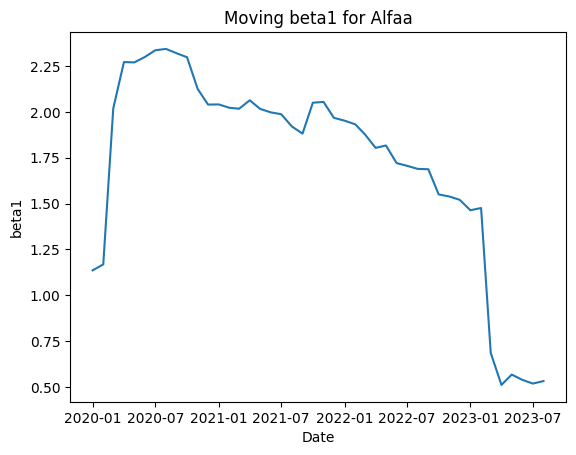

In [32]:
plt.clf()
plt.plot(betas['MXXret'])
plt.title('Moving beta1 for Alfaa')
plt.xlabel('Date')
plt.ylabel('beta1')
plt.show()

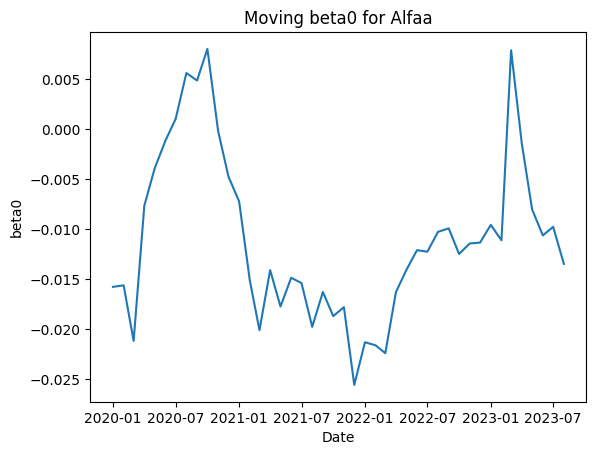

In [33]:
plt.clf()
plt.plot(betas['const'])
plt.title('Moving beta0 for Alfaa')
plt.xlabel('Date')
plt.ylabel('beta0')
plt.show()

We can see that the both beta coefficients move over time; they are not constant. There is no apparent pattern for the changes of the beta coefficients, but we can appreciate how much they can move over time; in other words, we can visualize their standard deviation, which is the average movement from their means.

We can actually calculate the mean and standard deviation of all these pairs of moving beta coefficients and see how they compare with their beta coefficients and their standard errors of the original regression when we use only 1 sample with the last 36 months:

In [34]:
betas.describe()

,const,MXXret
count,44.000000,44.000000
mean,-0.011048,1.721377
std,0.008326,0.547110
min,-0.025598,0.511303
25%,-0.016305,1.534241
50%,-0.012206,1.926777
75%,-0.007573,2.043266
max,0.007993,2.343573
